### [ 이미지 데이터 증강 ]
- torchvision.transforms에서 제공하는 기능

(1) 데이터 준비 및 모듈 로딩

In [11]:
from torchvision import transforms as tf
from torchvision.datasets import ImageFolder

In [12]:
# 각종 LIB 충돌 방지를 위한 환경 설정
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

===> 이미지 데이터 파일 준비

In [13]:
IMG_DIR = '../data/image/cat_dog/cat/'
RPS_DIR='../data/rps/'

In [15]:
## 이미지 데이터 저장
from PIL import Image

pil_img=Image.open(IMG_DIR+'cat_(2).jpeg')

print(f'shape  : {pil_img.size}')
print(f'width  : {pil_img.width}')
print(f'height : {pil_img.height}')
print(f'mode   : {pil_img.mode}')


shape  : (2392, 2500)
width  : 2392
height : 2500
mode   : RGB


===> 이미지 전처리 : 변형

[ 이미지 화면 출력 함수 ]

In [16]:
import matplotlib.pyplot as plt

def displayImage(tensor_img, title):
    plt.subplot(1,2, 1)
    plt.imshow(pil_img)
    plt.title("ORIGINAL")

    plt.subplot(1,2,2)
    plt.imshow(tensor_img.permute(1,2,0))
    plt.title(title)

    plt.show()

In [18]:
# 이미지 정보 출력 함수
def displayInfo(img):
    print(f'shape  : {img.shape}')
    print(f'ndim   : {img.ndim}')
    print(f'values : {img.min()} ~ {img.max()}')

###  Resize

In [19]:
# 변형 객체 생성
aug=tf.Compose([tf.Resize((100,100)),
                tf.ToTensor()])

# 이미지 변형
img=aug(pil_img)


# 변형 후 이미지 속성
displayInfo(img)

shape  : torch.Size([3, 100, 100])
ndim   : 3
values : 0.0 ~ 0.9764705896377563


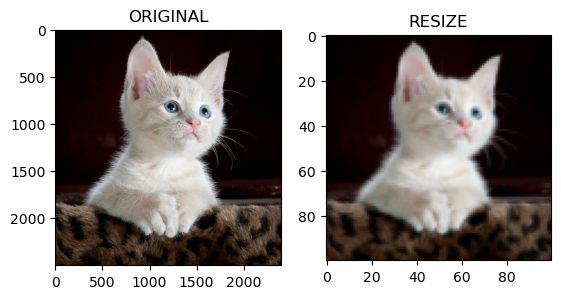

In [20]:
# Resize & Tensor 변형 후 비교
displayImage(img, "RESIZE")

Rotation

shape  : torch.Size([3, 3194, 3250])
ndim   : 3
values : 0.0 ~ 1.0
shape  : torch.Size([3, 3084, 3150])
ndim   : 3
values : 0.0 ~ 1.0
shape  : torch.Size([3, 2408, 2516])
ndim   : 3
values : 0.0 ~ 1.0
shape  : torch.Size([3, 2938, 3016])
ndim   : 3
values : 0.0 ~ 1.0
shape  : torch.Size([3, 3338, 3376])
ndim   : 3
values : 0.0 ~ 1.0
shape  : torch.Size([3, 2598, 2698])
ndim   : 3
values : 0.0 ~ 1.0
shape  : torch.Size([3, 2480, 2584])
ndim   : 3
values : 0.0 ~ 1.0
shape  : torch.Size([3, 2538, 2640])
ndim   : 3
values : 0.0 ~ 1.0
shape  : torch.Size([3, 2614, 2710])
ndim   : 3
values : 0.0 ~ 1.0
shape  : torch.Size([3, 2410, 2516])
ndim   : 3
values : 0.0 ~ 1.0


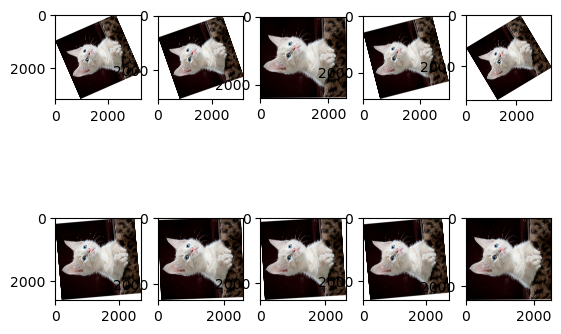

In [21]:
# 변형 객체 생성
# expand : 회전에 따른 이미지 전체를 담기 위한 크기 변경 여부 
# center(x, y) : 회전 중심
# fill : 회전 이미지 외부 영역 픽셀 채우기 값 
degree = 90, 121
aug=tf.Compose([tf.RandomRotation((degree), expand=True, fill=255),
                tf.ToTensor()])

for i in range(1, 11):
    # 이미지 변형
    img=aug(pil_img)
    
    # 이미지 저장
    tf.ToPILImage()(img).save(f"cat_02_ratation_{i:02}.jpg")

    # 변형 후 이미지 속성
    displayInfo(img)

    # Resize & Tensor 변형 후 비교
    plt.subplot(2,5,i)
    plt.imshow(img.permute(1,2,0))
    #plt.title()

plt.show()

RandomCrop : 랜덤 위치에서 지정된 크기 만큼 이미지 자르기

shape  : torch.Size([3, 60, 90])
ndim   : 3
values : 0.5372549295425415 ~ 0.8784313797950745
shape  : torch.Size([3, 60, 90])
ndim   : 3
values : 0.0 ~ 0.886274516582489
shape  : torch.Size([3, 60, 90])
ndim   : 3
values : 0.0 ~ 0.9882352948188782
shape  : torch.Size([3, 60, 90])
ndim   : 3
values : 0.0470588244497776 ~ 0.9137254953384399
shape  : torch.Size([3, 60, 90])
ndim   : 3
values : 0.0 ~ 0.8901960849761963
shape  : torch.Size([3, 60, 90])
ndim   : 3
values : 0.0 ~ 0.05882352963089943
shape  : torch.Size([3, 60, 90])
ndim   : 3
values : 0.38823530077934265 ~ 0.8784313797950745
shape  : torch.Size([3, 60, 90])
ndim   : 3
values : 0.0 ~ 0.0313725508749485
shape  : torch.Size([3, 60, 90])
ndim   : 3
values : 0.27450981736183167 ~ 0.9882352948188782
shape  : torch.Size([3, 60, 90])
ndim   : 3
values : 0.0 ~ 0.0784313753247261


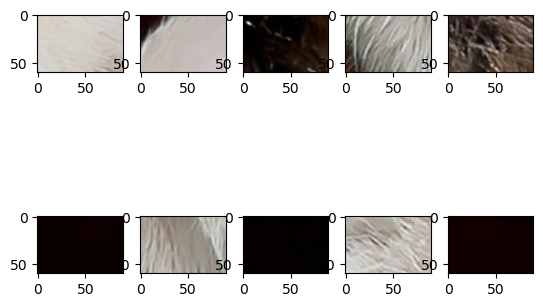

In [22]:
# 변형 객체 생성
crop_size = 60, 90
aug=tf.Compose([tf.RandomCrop(crop_size),
                tf.ToTensor()])

for i in range(1, 11):
    # 이미지 변형
    img=aug(pil_img)
    
    # 이미지 저장
    tf.ToPILImage()(img).save(f"cat_02_crop_{i:02}.jpg")

    # 변형 후 이미지 속성
    displayInfo(img)

    # Resize & Tensor 변형 후 비교
    plt.subplot(2,5,i)
    plt.imshow(img.permute(1,2,0))
    #plt.title()

plt.show()

RandomHorizontalFlip / RandomVerticalFlip : 좌우/상한 뒤집기

shape  : torch.Size([3, 60, 90])
ndim   : 3
values : 0.0 ~ 0.9607843160629272
shape  : torch.Size([3, 60, 90])
ndim   : 3
values : 0.0 ~ 0.5843137502670288
shape  : torch.Size([3, 60, 90])
ndim   : 3
values : 0.32549020648002625 ~ 0.886274516582489
shape  : torch.Size([3, 60, 90])
ndim   : 3
values : 0.0 ~ 0.07450980693101883
shape  : torch.Size([3, 60, 90])
ndim   : 3
values : 0.0 ~ 0.10588235408067703
shape  : torch.Size([3, 60, 90])
ndim   : 3
values : 0.6274510025978088 ~ 0.9019607901573181
shape  : torch.Size([3, 60, 90])
ndim   : 3
values : 0.0 ~ 0.04313725605607033
shape  : torch.Size([3, 60, 90])
ndim   : 3
values : 0.6235294342041016 ~ 0.886274516582489
shape  : torch.Size([3, 60, 90])
ndim   : 3
values : 0.0 ~ 1.0
shape  : torch.Size([3, 60, 90])
ndim   : 3
values : 0.40392157435417175 ~ 0.7960784435272217


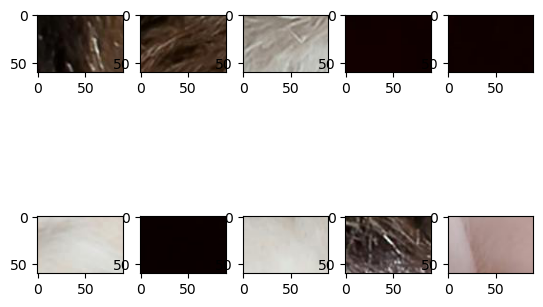

In [23]:
# 변형 객체 생성
crop_size = 60, 90
aug=tf.Compose([tf.RandomCrop(crop_size, padding=50, fill=255),
                tf.RandomHorizontalFlip(),
                tf.RandomVerticalFlip(),
                tf.ToTensor()])

for i in range(1, 11):
    # 이미지 변형
    img=aug(pil_img)
    
    # 이미지 저장
    tf.ToPILImage()(img).save(f"cat_02_HF_CROP_{i:02}.jpg")

    # 변형 후 이미지 속성
    displayInfo(img)

    # Resize & Tensor 변형 후 비교
    plt.subplot(2,5,i)
    plt.imshow(img.permute(1,2,0))
    #plt.title()

plt.show()

RandomErasing : 랜덤한 부분을 박스 모양으로 지워줌 
- 반드시 tensor로 변환 먼저 진행 후 진행

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


shape  : torch.Size([3, 2500, 2392])
ndim   : 3
values : 0.0 ~ 255.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


shape  : torch.Size([3, 2500, 2392])
ndim   : 3
values : 0.0 ~ 255.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


shape  : torch.Size([3, 2500, 2392])
ndim   : 3
values : 0.0 ~ 255.0
shape  : torch.Size([3, 2500, 2392])
ndim   : 3
values : 0.0 ~ 1.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


shape  : torch.Size([3, 2500, 2392])
ndim   : 3
values : 0.0 ~ 255.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


shape  : torch.Size([3, 2500, 2392])
ndim   : 3
values : 0.0 ~ 255.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


shape  : torch.Size([3, 2500, 2392])
ndim   : 3
values : 0.0 ~ 255.0
shape  : torch.Size([3, 2500, 2392])
ndim   : 3
values : 0.0 ~ 1.0
shape  : torch.Size([3, 2500, 2392])
ndim   : 3
values : 0.0 ~ 1.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


shape  : torch.Size([3, 2500, 2392])
ndim   : 3
values : 0.0 ~ 255.0


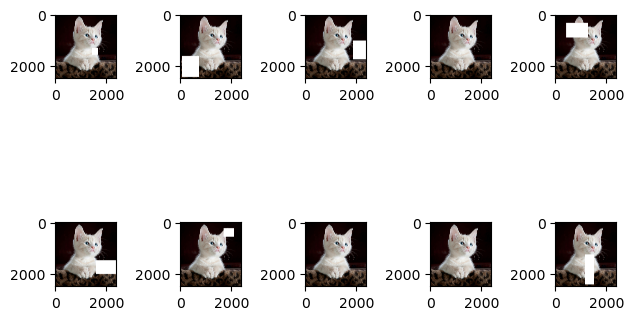

In [24]:
# 변형 객체 생성
aug=tf.Compose([tf.ToTensor(),
                tf.RandomErasing(p=0.7, scale=(0.01, 0.1), ratio=(0.5, 3.5), value=255)
                ])

for i in range(1, 11):
    # 이미지 변형
    img=aug(pil_img)
    
    # 이미지 저장
    tf.ToPILImage()(img).save(f"cat_02_ERASING_{i:02}.jpg")

    # 변형 후 이미지 속성
    displayInfo(img)

    # Resize & Tensor 변형 후 비교
    plt.subplot(2,5,i)
    plt.imshow(img.permute(1,2,0))
    #plt.title()

plt.tight_layout()
plt.show()

RandomGrayscale

shape  : torch.Size([3, 2500, 2392])
ndim   : 3
values : 0.0 ~ 0.9999000430107117
shape  : torch.Size([3, 2500, 2392])
ndim   : 3
values : 0.0 ~ 0.9999000430107117
shape  : torch.Size([3, 2500, 2392])
ndim   : 3
values : 0.0 ~ 0.9999000430107117
shape  : torch.Size([3, 2500, 2392])
ndim   : 3
values : 0.0 ~ 0.9999000430107117
shape  : torch.Size([3, 2500, 2392])
ndim   : 3
values : 0.0 ~ 0.9999000430107117
shape  : torch.Size([3, 2500, 2392])
ndim   : 3
values : 0.0 ~ 0.9999000430107117
shape  : torch.Size([3, 2500, 2392])
ndim   : 3
values : 0.0 ~ 1.0
shape  : torch.Size([3, 2500, 2392])
ndim   : 3
values : 0.0 ~ 0.9999000430107117
shape  : torch.Size([3, 2500, 2392])
ndim   : 3
values : 0.0 ~ 0.9999000430107117
shape  : torch.Size([3, 2500, 2392])
ndim   : 3
values : 0.0 ~ 1.0


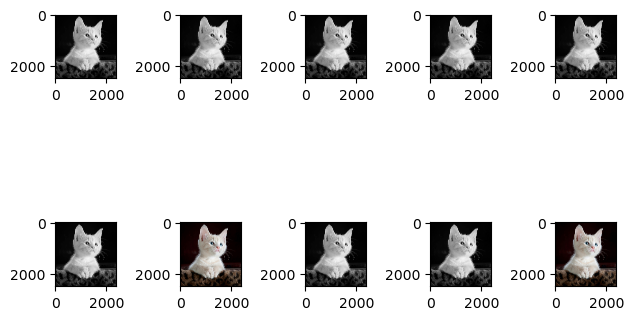

In [25]:
# 변형 객체 생성
aug=tf.Compose([tf.ToTensor(),
                tf.RandomGrayscale(p=0.7)
                ])

for i in range(1, 11):
    # 이미지 변형
    img=aug(pil_img)
    
    # 이미지 저장
    tf.ToPILImage()(img).save(f"cat_02_GRAY_{i:02}.jpg")

    # 변형 후 이미지 속성
    displayInfo(img)

    # Resize & Tensor 변형 후 비교
    plt.subplot(2,5,i)
    plt.imshow(img.permute(1,2,0))
    #plt.title()

plt.tight_layout()
plt.show()